# Seaborn {#sec-seaborn}
![](../../figures/art_85.png){ width=40% } 

## Elevare la Visualizzazione dei Dati con Seaborn

Nel capitolo precedente, abbiamo esaminato Matplotlib, una libreria estremamente versatile per la visualizzazione dei dati in Python. Ora esamineremo le funzionalità di Seabonrn. Seaborn, che si basa su Matplotlib, arricchisce l'esperienza di visualizzazione dei dati offrendo una gamma più ampia e specializzata di opzioni grafiche, particolarmente utili nel campo della data science.

Il vero punto di forza di Seaborn è la sua capacità di migliorare non solo l'aspetto estetico dei grafici ma anche di facilitare la creazione di visualizzazioni più complesse. Questo rende il processo più diretto e intuitivo. La libreria è dotata di un'ampia varietà di strumenti, dalle mappe di calore ai grafici a violino, permettendo agli utenti di esplorare e rappresentare i dati in modi innovativi e informativi.

Per chi vuole approfondire ulteriormente, i tutorial presenti sul [sito ufficiale di Seaborn](https://seaborn.pydata.org/) sono una risorsa preziosa e facilmente accessibile.

## Preparazione del Notebook

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "seaborn"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

## Visualizzare la distribuzione dei dati

Vediamo alcuni esempi pratici per scoprire come Seaborn possa trasformare il modo in cui visualizziamo i dati.

Consideriamo nuovamente i dati Palmer penguin.

In [3]:
df = pd.read_csv("../data/penguins.csv")

Una delle forme di visualizzazione più comuni e informative nel campo dell'analisi dei dati è l'istogramma, e la sua variante più sofisticata, l'istogramma lisciato. Vediamo dunque come generare istogrammi che, per il DataFrame `df`, sono stratificati sia in base alla specie che al genere dei pinguini.

/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


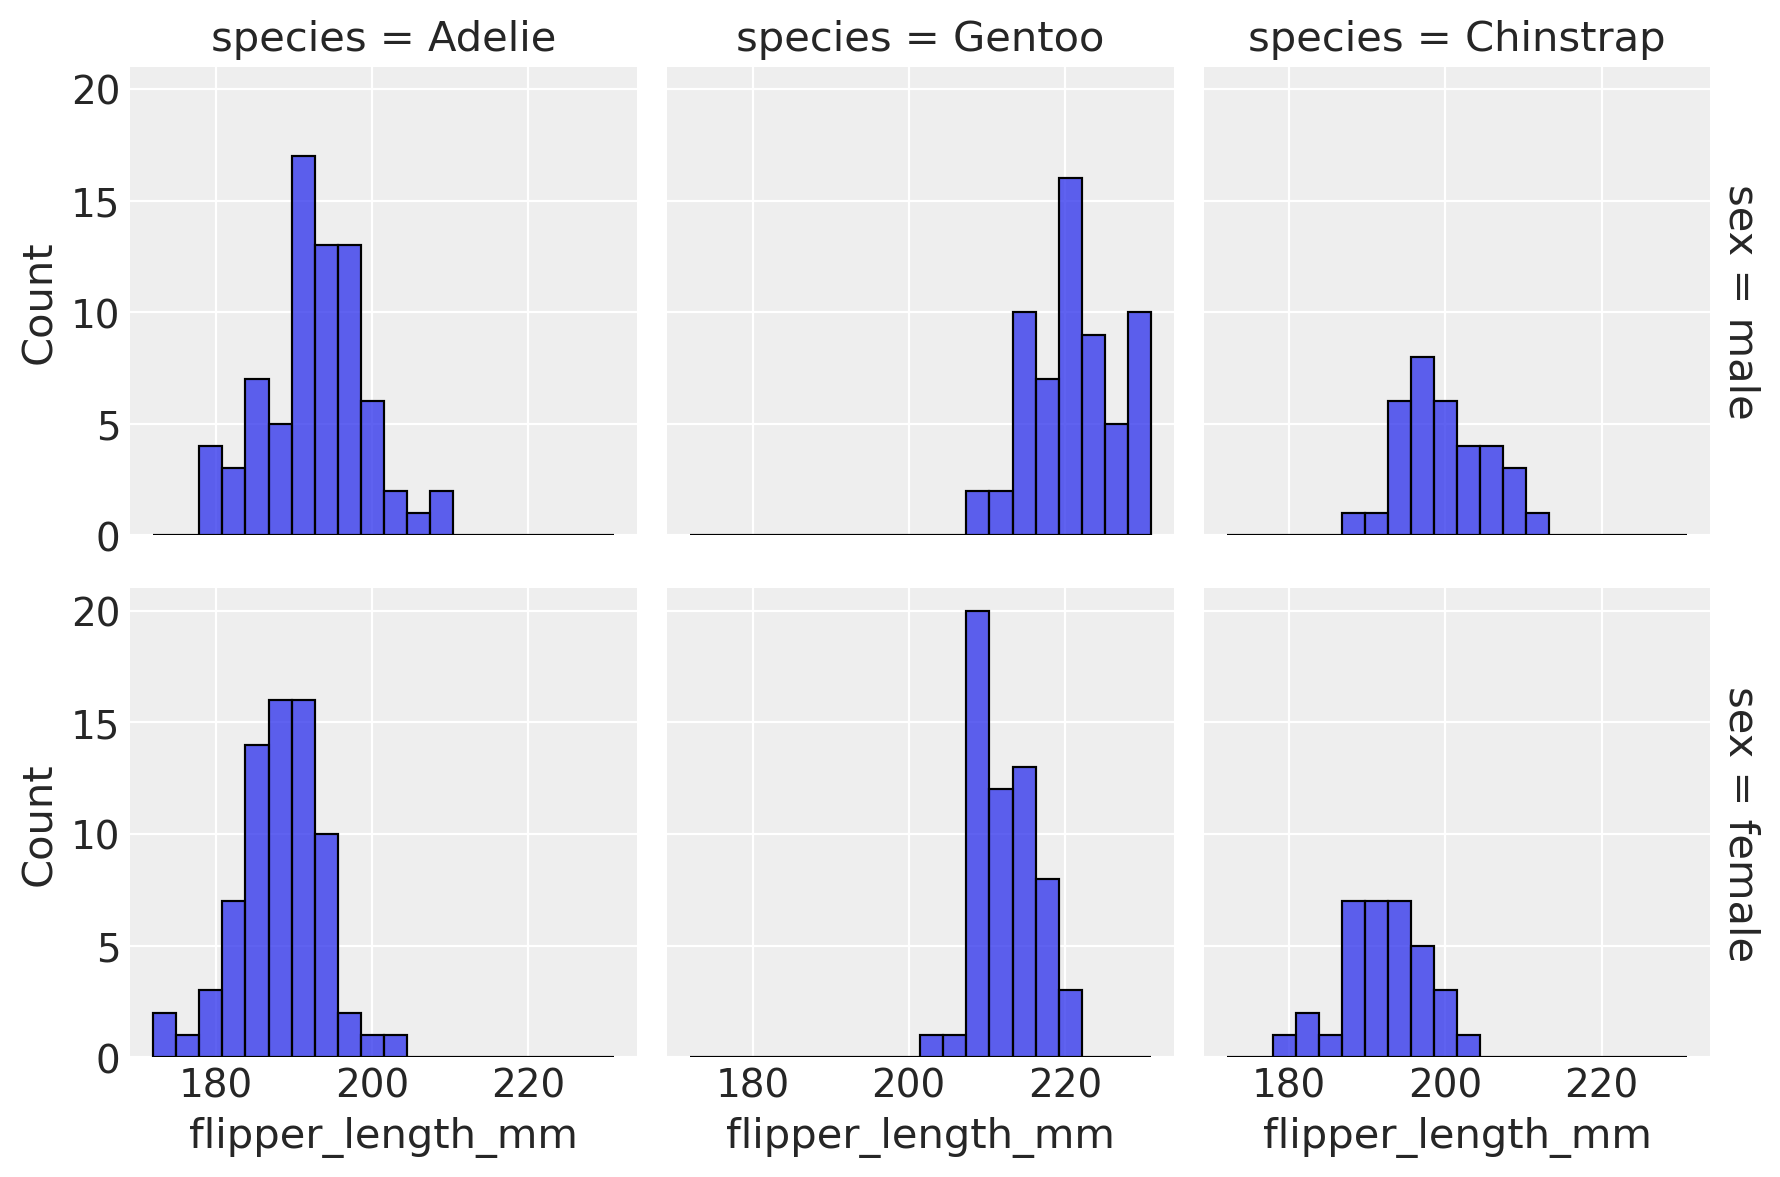

In [4]:
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
);

Generiamo la stessa figura usando questa volta gli istogrammi lisciati.

/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


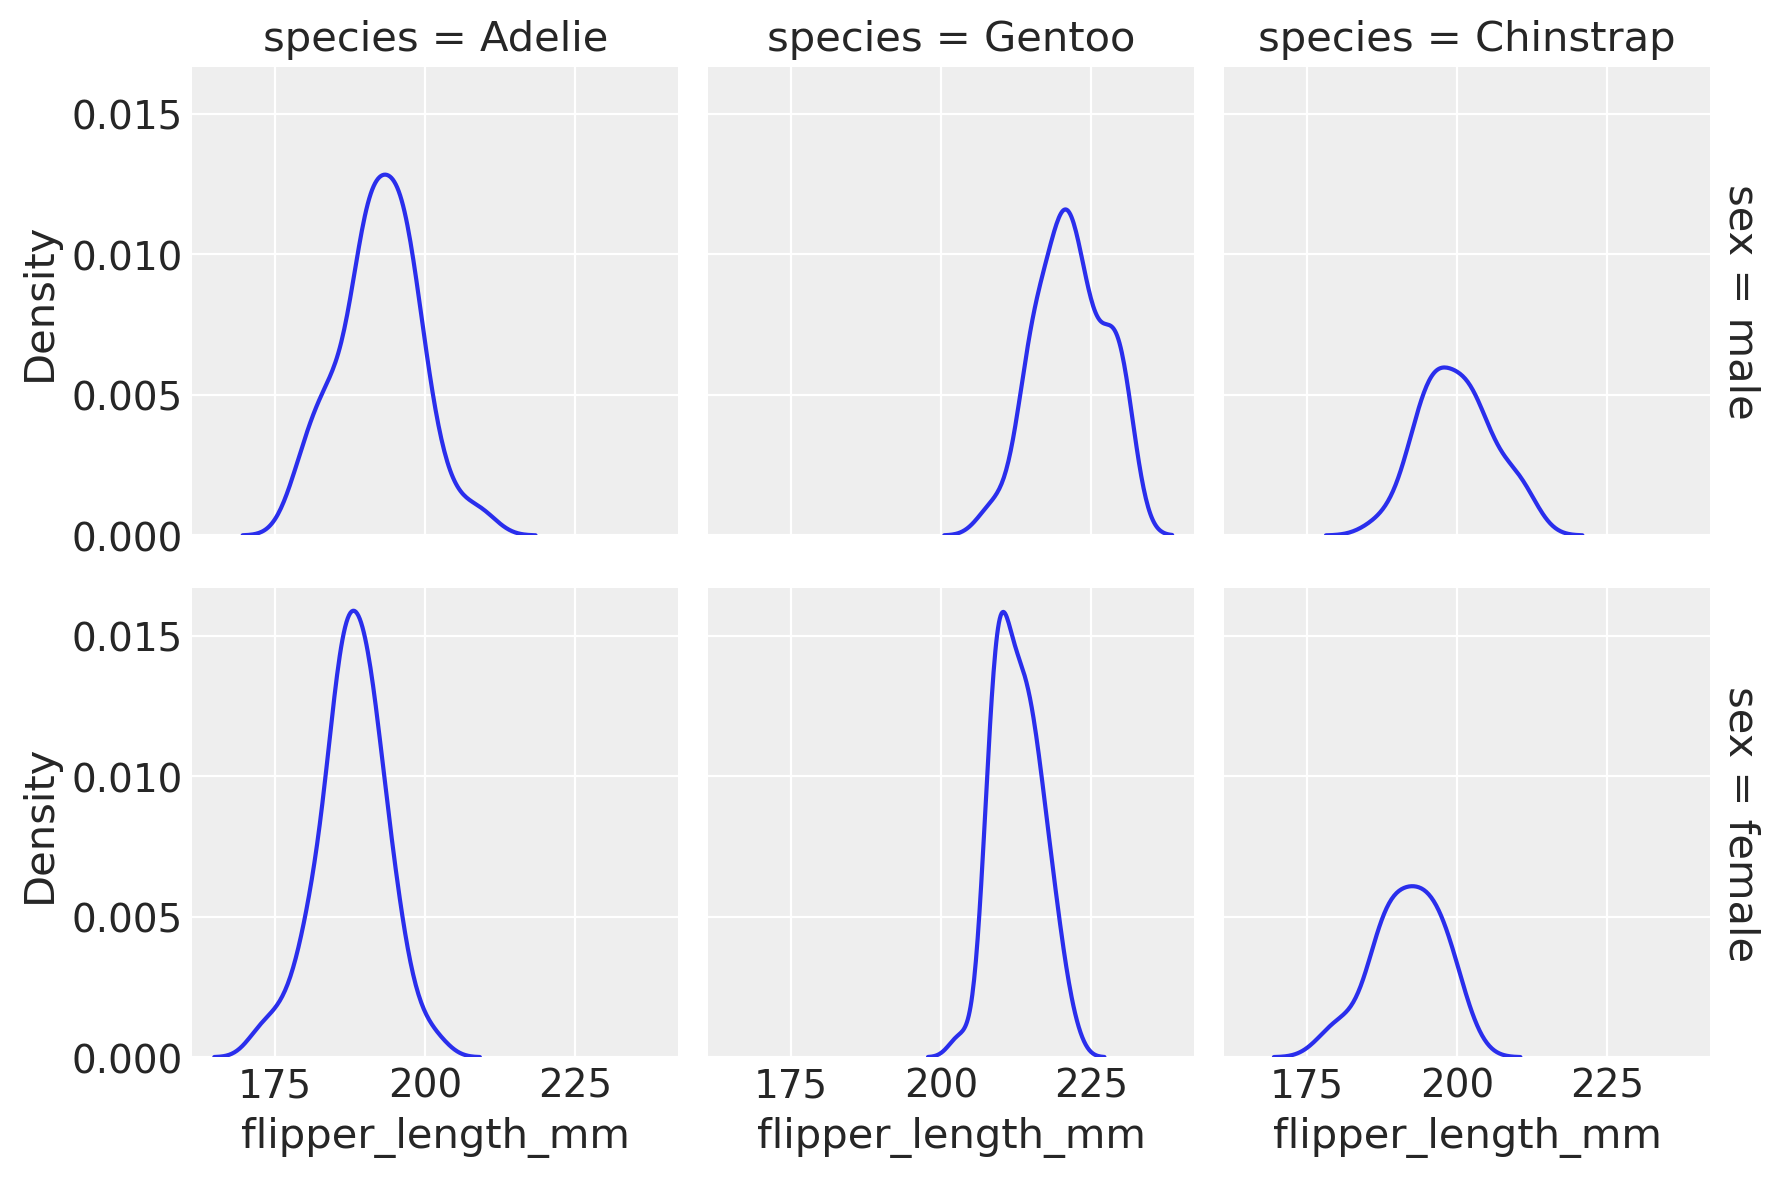

In [5]:
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    height=3, kind="kde", facet_kws=dict(margin_titles=True),
);

## Visualizzazione di dati categoriali

Consideriamo ora il caso in cui si vuole rappresentare la relazione tra una variabile numerica e una o più variabili categoriali. 

Consideriamo, ad esempio, la massa corporea in relazione alla specie, differenziando le osservazioni per genere. Creiamo il grafico utilizzando i boxplot.

/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


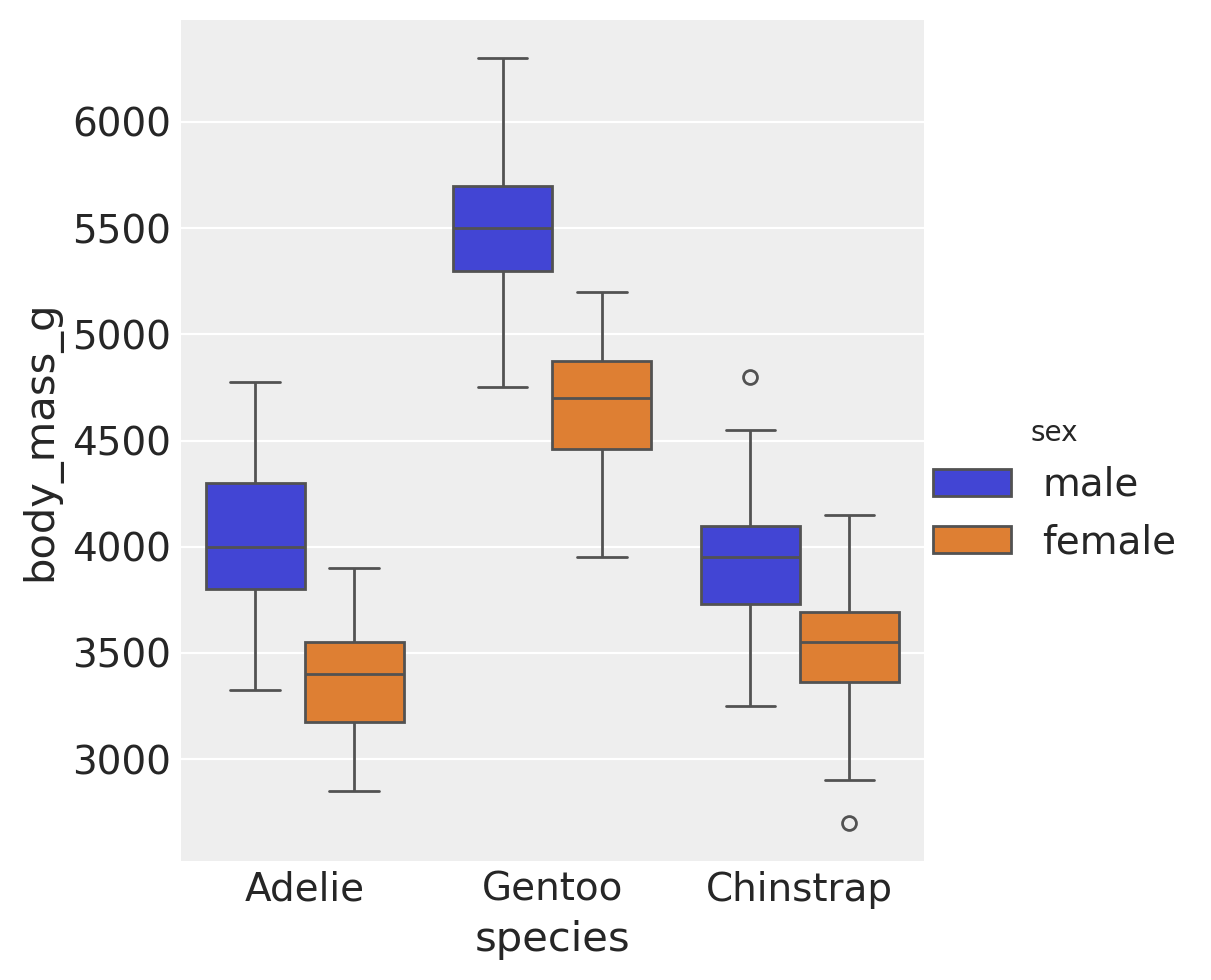

In [6]:
sns.catplot(df, x="species", y="body_mass_g", hue="sex", kind="box")

Dai diagrammi risulta evidente che i pinguini maschi hanno un peso maggiore rispetto alle femmine in tutte le specie, e che i pinguini Gentoo hanno un peso superiore rispetto ad Adelie e Chinstrap.

Come alternativa, possiamo utilizzare il violinplot per la rappresentazione grafica dei dati.

/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


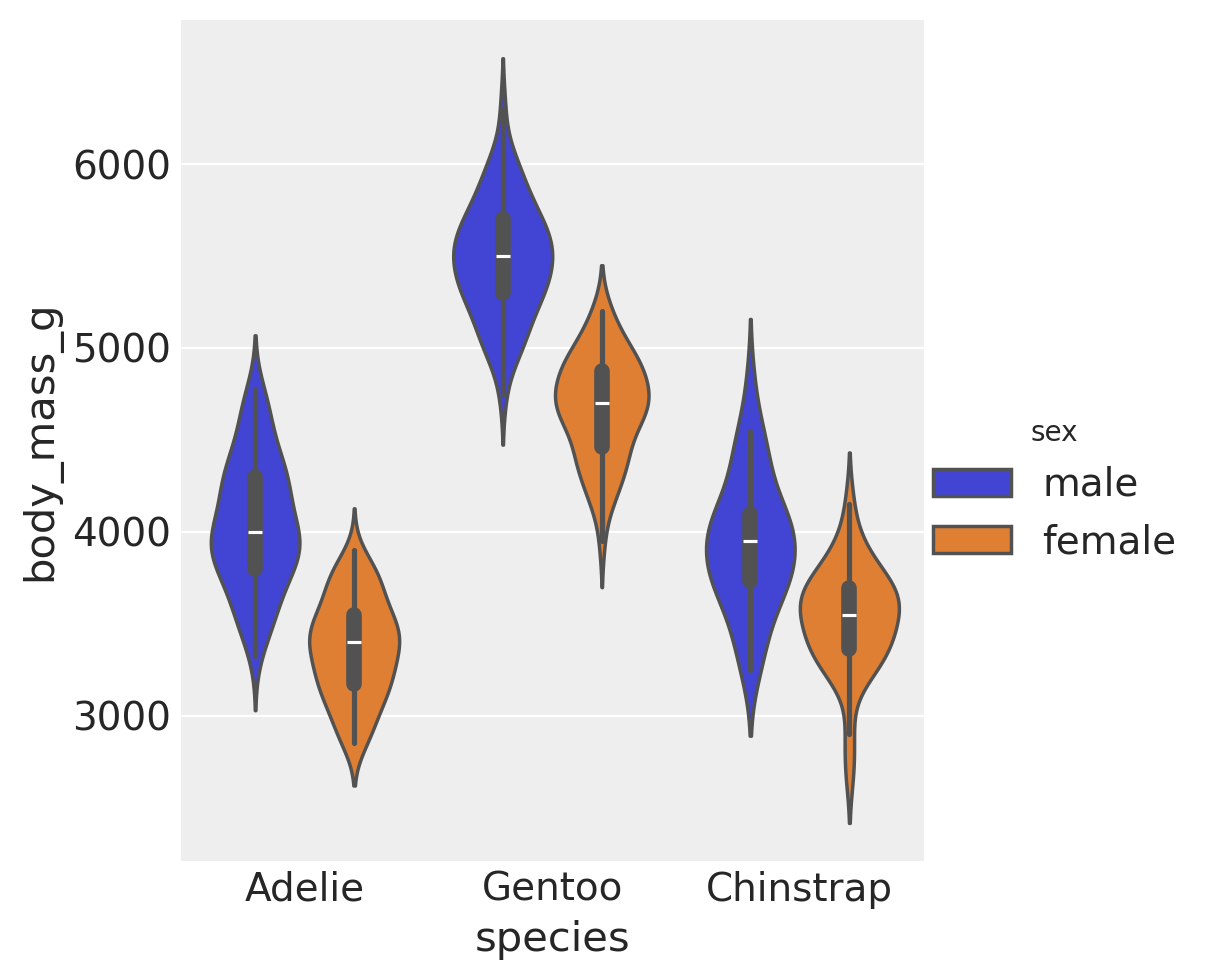

In [7]:
sns.catplot(df, x="species", y="body_mass_g", hue="sex", kind="violin")

## Relazioni tra variabili

Calcoliamo la correlazione tra le variabili.

In [8]:
vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
corr_matrix = df[vars].corr().round(2)
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


Queste informazioni possono essere comunicate in forma più diretta se usiamo una rappresentazione grafica.

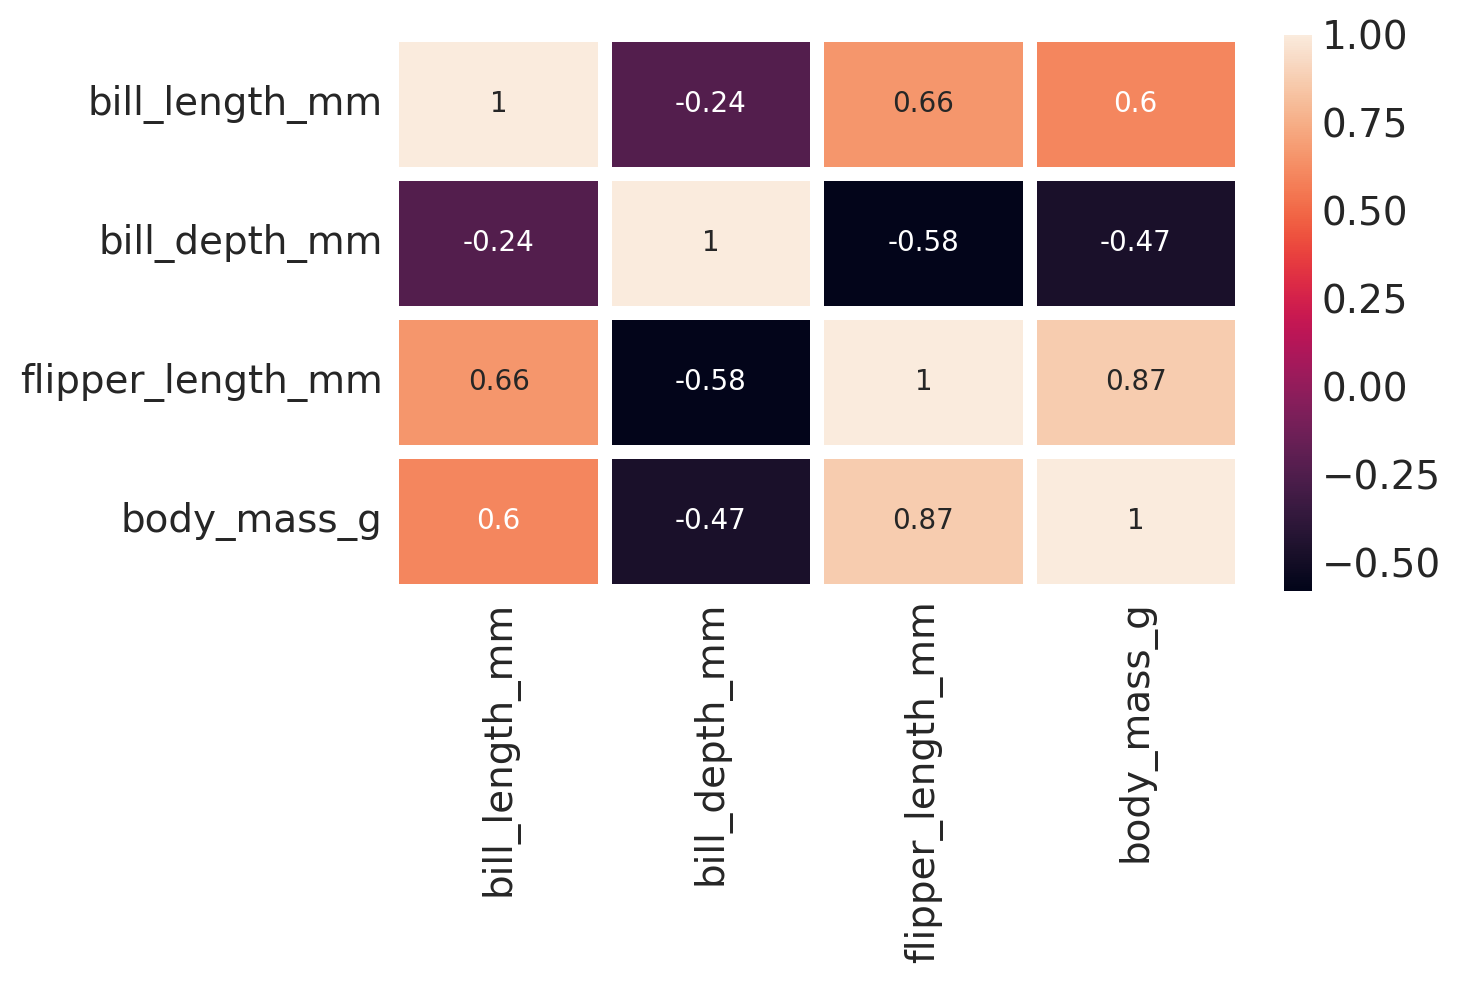

In [9]:
sns.heatmap(corr_matrix, annot=True, linecolor="white", linewidths=5);

La lunghezza della pinna e la massa corporea mostrano un forte legame, con una correlazione di 0.87. Ciò indica che i pinguini con pinne più lunghe tendono a pesare di più.

Di seguito è riportato un esempio di diagramma a dispersione che illustra questa relazione.

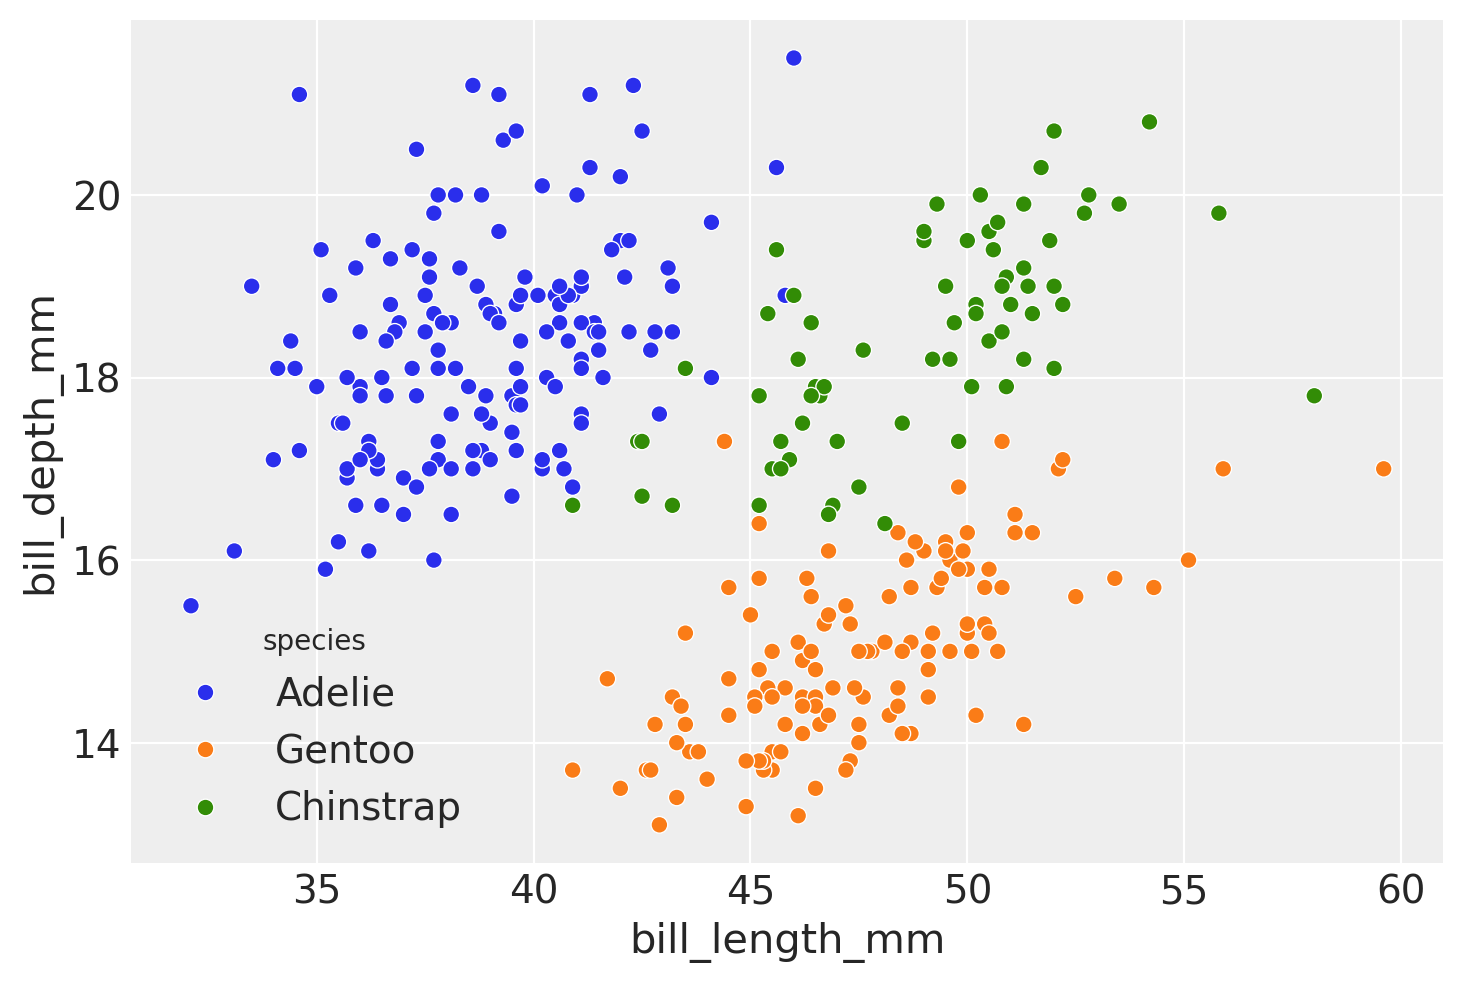

In [10]:
sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species");

Evidentemente, le osservazioni delle tre specie formano cluster distinti. Per ciascuna specie, la lunghezza e la larghezza del becco presentano un intervallo specifico.

Spesso è vantaggioso creare grafici separati in base a diverse dimensioni dei dati; nell'esempio seguente, suddividiamo i dati in base all'isola di appartenenza.

/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


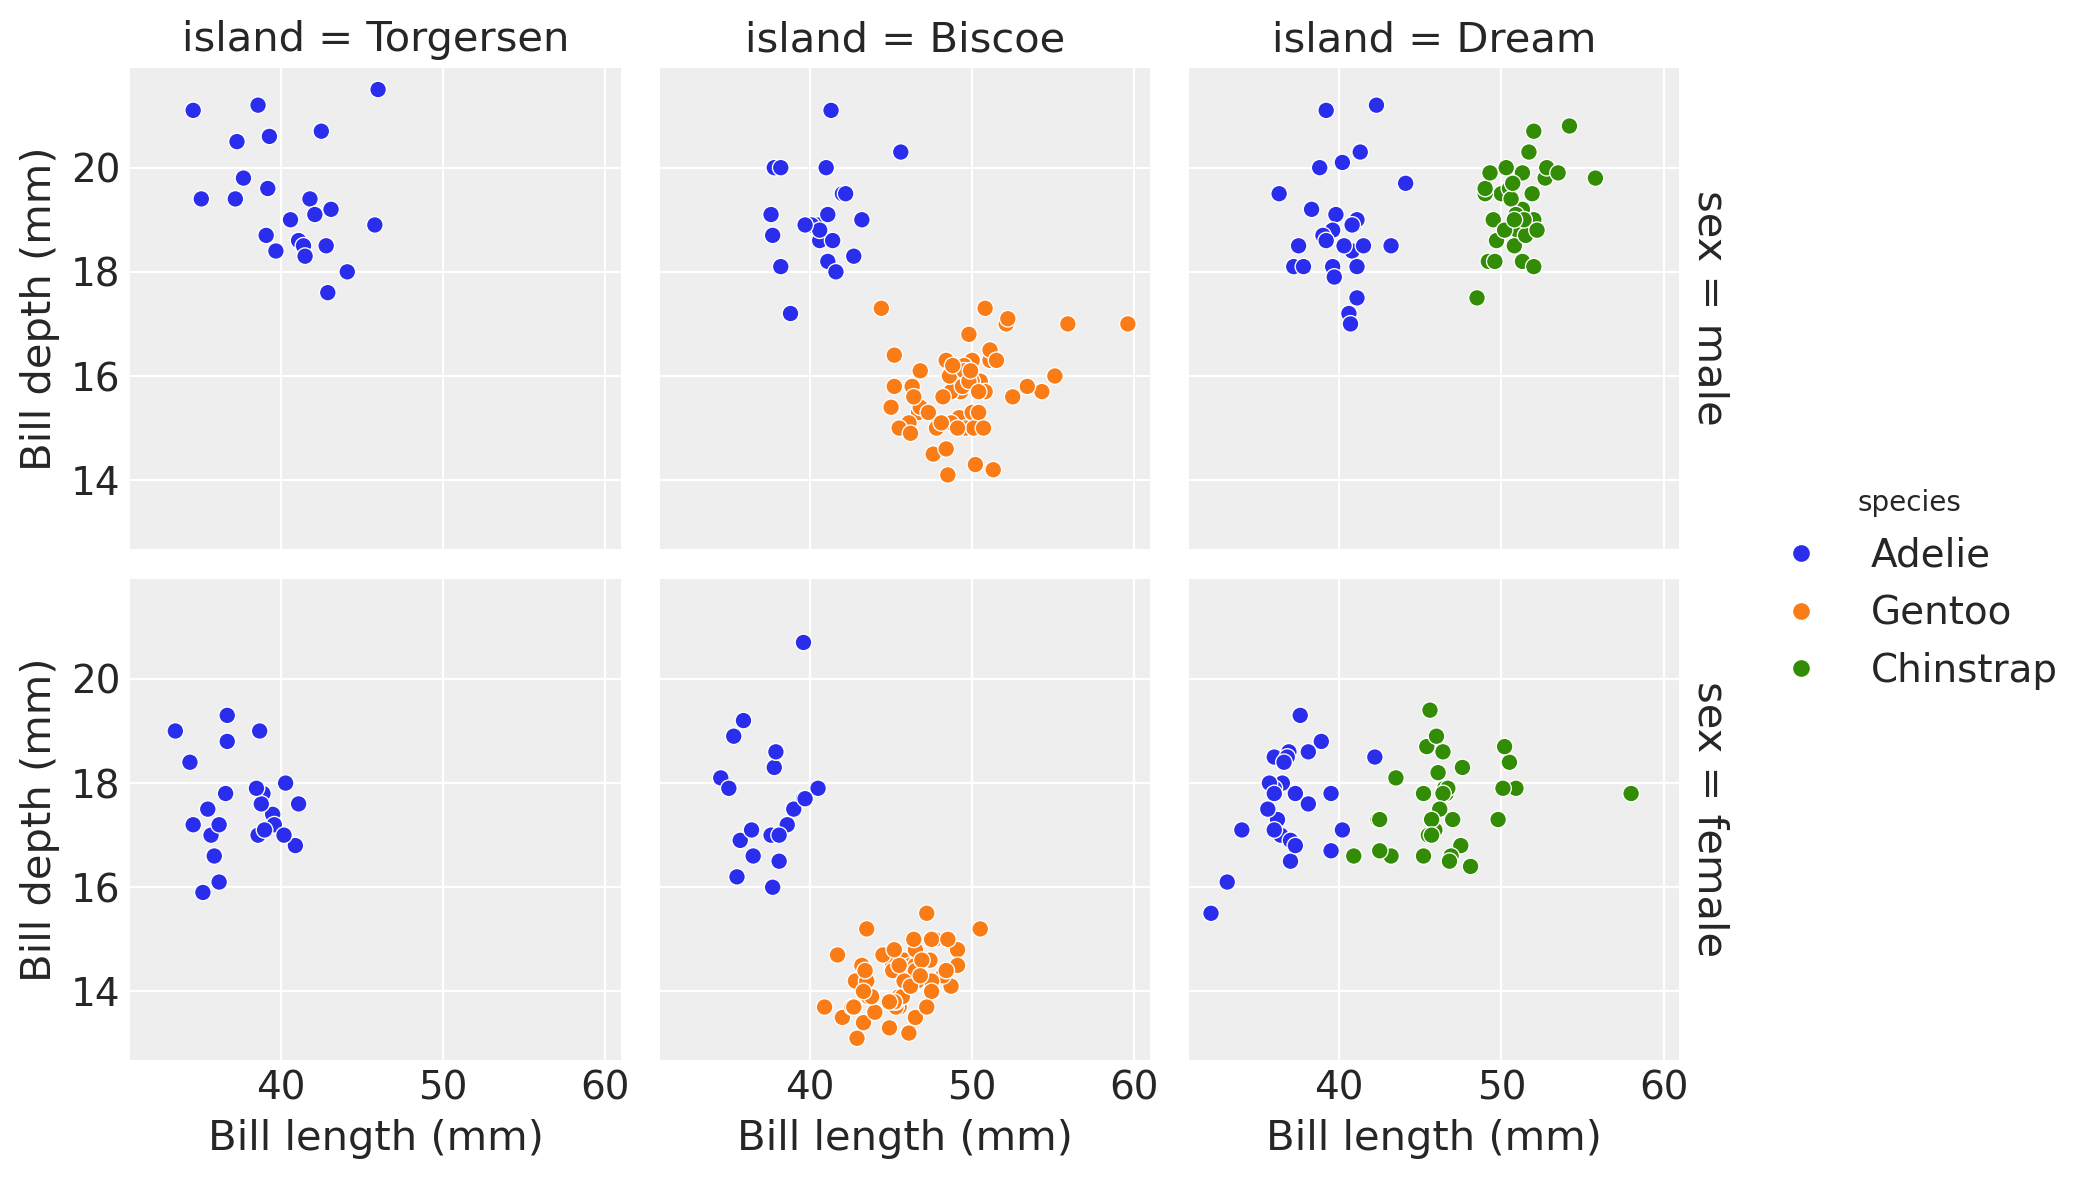

In [11]:
g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    row="sex",
    col="island",
    height=3,
    facet_kws=dict(margin_titles=True),
)
g.set_axis_labels(
    "Bill length (mm)",
    "Bill depth (mm)",
);

## Informazioni sull'Ambiente di Sviluppo

In [12]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sat Jun 08 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.8.4
arviz     : 0.18.0
pandas    : 2.2.2
numpy     : 1.26.4
seaborn   : 0.13.2

Watermark: 2.4.3

